In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pickle
%matplotlib inline

In [2]:
#https://www.kaggle.com/c/titanic/data
data_train = pd.read_csv("titanic_train.csv")

## Algumas Informações sobre os dados:
Dados Disponiveis no [Kaggle](https://www.kaggle.com/c/titanic/data)

* **PassengerId** - Id do passageiro no navio (identificador único);

* **survived**  - Se o passageiro sobreviveu o naufragio ou não - 1 caso 
sobreviveu, caso contrário 0;

* **Pclss** - Tipo da classe de passagem (de 1 a 3) sendo considerando a 3 classe como pior;

* **Name** - Nome do Passageiro;

* **Sex** - Genero do passegeiro, masculino ou feminino;

* **Age** - Idade do passageiro;

* **SibSp** - Número de irmãos/conjugues a bordo;

* **Parch** - Código do ticket;

* **Fare** - Valor da passagem;

* **cabin** - código da cabine;

* **embarked** - Local onde o passageiro entrou no navio (C = Cherbourg, Q = Queenstown, S = Southampton).

**Objetivo:** Predizer se um passegeiro atraves de suas caracteristicas irá sobreviver ao naufragio do titanic ou não.

In [116]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Análise Exploratória dos Dados
### Dados Faltantes

In [117]:
# porcentagem dos dados faltantes no conjunto de treino
data_train.isna().mean().round(4) * 100

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

Percebe-se que 77,10% dos passageiros não possuem a informação de cabine. Além disso, 20% apresentam dados faltantes em relação a sua idade

### Estatisticas descritivas e Gráficos

Realizando-se uma estatsitica descritiva, percebe-se que a maioria dos passageiros estavam na classe 3 e que 50% dos passageiros possuia em media de 28 anos de idade. A maioria apresentava apenas 1 filho tendo como maxima de 8 filhos. Além disso, o maior valor a ser pago foi de 512 dólares.

Nota-se que alguns valores de idade são menores do que 20 porém não negativos.

In [118]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Nota-se que 342 passageiros sobreviveram ao naufragio o que representa apenas 36%

0    549
1    342
Name: Survived, dtype: int64


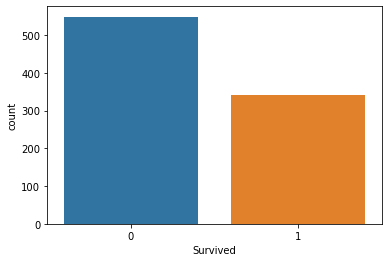

In [119]:
sns.countplot("Survived",data=data_train)
print(data_train["Survived"].value_counts())

Percebe-se que a maioria dos sobrevientes ao naufragio foram pessoas da primeira classe e ao contrário foram pessoas da terceira classe. Além disso, há uma distrubição similar entre os passageiros da segunda classe, isto cria-se há hipotese de que pode estar relacionado com o genêro do passageiro?

Ao analisar o genero dos passageiros, percebe-se que a maiora dos sobreviventes ao naufragio são do genero feminino. Além disso, passageiros que entraram na parte de Queenstown do navio não sobreviram ao naufragerio ao contrário da entrada de Southampton

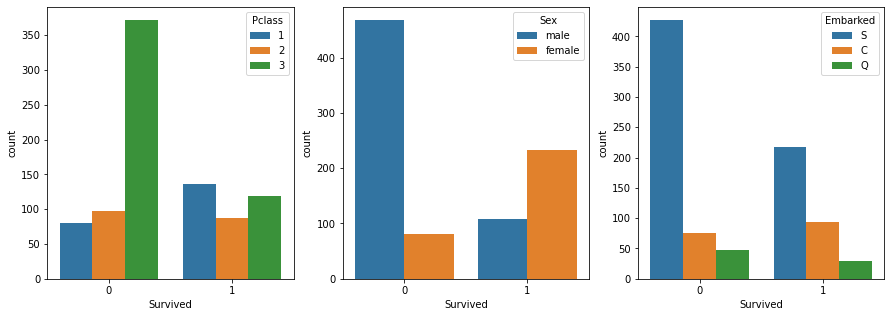

In [120]:
fig, ax =plt.subplots(1,3,figsize=(15,5))
sns.countplot("Survived",hue="Pclass",data=data_train,ax=ax[0])
sns.countplot("Survived",hue="Sex",data=data_train,ax=ax[1])
sns.countplot("Survived",hue="Embarked",data=data_train,ax=ax[2])

Nota-se que crianças e passageiros entre 30-40 anos conseguiram sobreviver ao naufragio, enquanto pessoas mais jovens entre 20-25 anos não tiveram esta mesma chance.

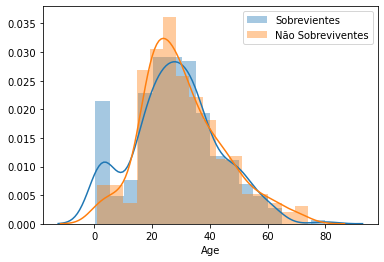

In [121]:
sns.distplot(data_train[data_train["Survived"]==1]["Age"],label="Sobrevientes")
sns.distplot(data_train[data_train["Survived"]==0]["Age"],label = "Não Sobreviventes")
plt.legend()

In [122]:
def plot_correlation(corr_matrix, figsize):
    f, ax = plt.subplots(figsize=figsize)
    mask = np.zeros_like(corr_matrix, dtype=np.bool)
    mask[np.triu_indices_from(mask)]= True
    heatmap = sns.heatmap(corr_matrix,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})

    #add the column names as labels
    ax.set_yticklabels(corr_matrix.columns, rotation = 0)
    ax.set_xticklabels(corr_matrix.columns)

Nota-se que não há uma correlação significativa entre as variaveis númericas

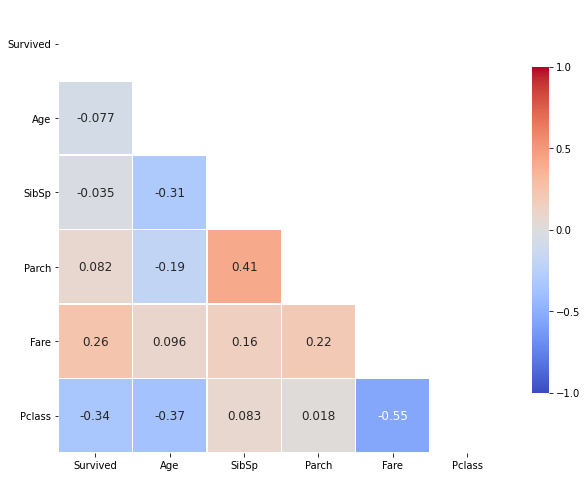

In [123]:
plot_correlation(data_train[["Survived","Age","SibSp","Parch","Fare","Pclass"]].corr(),(10,15))

## Tratamento dados Faltantes
Através do boxplot percebe-se a presença de alguns valores atipicos de idade que podem ser considerados como outilers. Além disso, a distribuição de idade possui um comportamento assimetrico para esquerda.

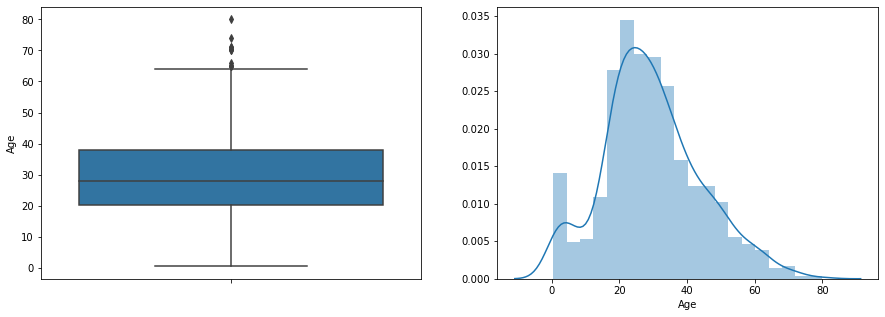

In [124]:
fig, ax =plt.subplots(1,2,figsize=(15,5))
sns.boxplot(y="Age",data=data_train,ax=ax[0])
sns.distplot(data_train["Age"],ax=ax[1])

Nota-se que passageiros que estão na primeira classe são mais velhos em relação as outras classes. Além disso, a distribuição dos dados são quase normais.

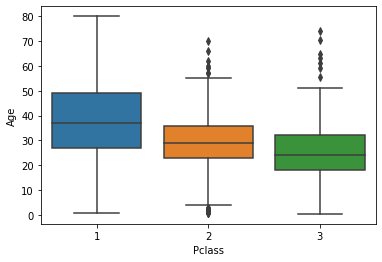

In [125]:
sns.boxplot("Pclass","Age",data=data_train)

Como há poucos dados faltantes por tipo de classe do passageiro, sera utilizada a abordagem de preenchimento através da mediana destes valores

In [126]:
def imputar_idade(data):
    if pd.isnull(data["Age"]):
        if data["Pclass"] == 1:
            return 38
        elif data["Pclass"] == 2:
            return 29
        else:
            return 25
    else:
        return data["Age"]
print(data_train.groupby("Pclass")["Age"].mean())
print(data_train[data_train["Age"].isna()].groupby("Pclass").size())
data_train["Age"] = data_train.apply(imputar_idade,axis=1)

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64
Pclass
1     30
2     11
3    136
dtype: int64


## Criação do Modelo Predição
É necessario converter as váriaveis categoriacas para valores númericos, além disso excluir váriaiveis que não possuem relevancia para o modelo

In [128]:
sex = pd.get_dummies(data_train['Sex'],drop_first=True)
embark = pd.get_dummies(data_train['Embarked'],drop_first=True)

data_train.drop(["PassengerId","Name","Ticket","Cabin","Sex","Embarked"],axis=1,inplace=True)

data_train = pd.concat([data_train,sex,embark],axis=1)

In [129]:
X_train, X_test, y_train, y_test = train_test_split(data_train.drop('Survived',axis=1), 
                                                    data_train['Survived'], test_size=0.30)

In [130]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Percebe-se que o modelo possui uma acuracia de 80.26% utilizando um modelo de regressão logistica

In [133]:
logmodel_acc = round(logmodel.score(X_train, y_train) * 100, 2)
print("Acuracia do modelo igual a:", logmodel_acc)

Acuracia do modelo igual a: 80.26


Salvando o modelo treinado na memoria através do pickle, para logo mais ser utilizado em outras aplicacoes ou no webapp

In [2]:
pickle.dump(logmodel, open('model.pkl','wb'))

NameError: name 'logmodel' is not defined

In [148]:
logmodel.predict([[3,32,0,0,7.7500,1,1,0]])

array([0], dtype=int64)